<a href="https://colab.research.google.com/github/mattsmit4/DFScode/blob/main/_Main_OwnersBox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.3 MB 12.2 MB/s 


In [2]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pulp import *
import tensorflow as tf
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import itertools

***Week Needs Updating***

In [3]:
# Current week in NFL
week = 12

In [4]:
# Bringing in all the data
df_2013 = []
for i in range(1, 18):
    df = locals()[f'df{i}'] = pd.read_csv(fr"drive/MyDrive/Fantasy-Football-Coding/Fantasy-Data/OwnersBox/Combined/2013/combined-wk{i}.csv")
    df_2013.append(df)
df_2013 = pd.concat(df_2013)
df_2013 = df_2013.loc[df_2013.Position.isin(['QB', 'RB', 'WR', 'TE'])]

df_2014 = []
for i in range(1, 18):
    df = locals()[f'df{i}'] = pd.read_csv(fr"drive/MyDrive/Fantasy-Football-Coding/Fantasy-Data/OwnersBox/Combined/2014/combined-wk{i}.csv")
    df_2014.append(df)
df_2014 = pd.concat(df_2014)
df_2014 = df_2014.loc[df_2014.Position.isin(['QB', 'RB', 'WR', 'TE'])]

df_2015 = []
for i in range(1, 18):
    df = locals()[f'df{i}'] = pd.read_csv(fr"drive/MyDrive/Fantasy-Football-Coding/Fantasy-Data/OwnersBox/Combined/2015/combined-wk{i}.csv")
    df_2015.append(df)
df_2015 = pd.concat(df_2015)
df_2015 = df_2015.loc[df_2015.Position.isin(['QB', 'RB', 'WR', 'TE'])]

df_2016 = []
for i in range(1, 18):
    df = locals()[f'df{i}'] = pd.read_csv(fr"drive/MyDrive/Fantasy-Football-Coding/Fantasy-Data/OwnersBox/Combined/2016/combined-wk{i}.csv")
    df_2016.append(df)
df_2016 = pd.concat(df_2016)
df_2016 = df_2016.loc[df_2016.Position.isin(['QB', 'RB', 'WR', 'TE'])]

df_2017 = []
for i in range(1, 18):
    df = locals()[f'df{i}'] = pd.read_csv(fr"drive/MyDrive/Fantasy-Football-Coding/Fantasy-Data/OwnersBox/Combined/2017/combined-wk{i}.csv")
    df_2017.append(df)
df_2017 = pd.concat(df_2017)
df_2017 = df_2017.loc[df_2017.Position.isin(['QB', 'RB', 'WR', 'TE'])]

df_2018 = []
for i in range(1, 18):
    df = locals()[f'df{i}'] = pd.read_csv(fr"drive/MyDrive/Fantasy-Football-Coding/Fantasy-Data/OwnersBox/Combined/2018/combined-wk{i}.csv")
    df_2018.append(df)
df_2018 = pd.concat(df_2018)
df_2018 = df_2018.loc[df_2018.Position.isin(['QB', 'RB', 'WR', 'TE'])]

df_2019 = []
for i in range(1, 18):
    df = locals()[f'df{i}'] = pd.read_csv(fr"drive/MyDrive/Fantasy-Football-Coding/Fantasy-Data/OwnersBox/Combined/2019/combined-wk{i}.csv")
    df_2019.append(df)
df_2019 = pd.concat(df_2019)
df_2019 = df_2019.loc[df_2019.Position.isin(['QB', 'RB', 'WR', 'TE'])]

df_2020 = []
for i in range(1, 18):
    df = locals()[f'df{i}'] = pd.read_csv(fr"drive/MyDrive/Fantasy-Football-Coding/Fantasy-Data/OwnersBox/Combined/2020/combined-wk{i}.csv")
    df_2020.append(df)
df_2020 = pd.concat(df_2020)
df_2020 = df_2020.loc[df_2020.Position.isin(['QB', 'RB', 'WR', 'TE'])]

df_2021 = []
for i in range(1, 19):
    df = locals()[f'df{i}'] = pd.read_csv(fr"drive/MyDrive/Fantasy-Football-Coding/Fantasy-Data/OwnersBox/Combined/2021/combined-wk{i}.csv")
    df_2021.append(df)
df_2021 = pd.concat(df_2021)
df_2021 = df_2021.loc[df_2021.Position.isin(['QB', 'RB', 'WR', 'TE'])]
 
df_2022 = []
for i in range(1, week):
    df = locals()[f'df{i}'] = pd.read_csv(fr"drive/MyDrive/Fantasy-Football-Coding/Fantasy-Data/OwnersBox/Combined/2022/combined-wk{i}.csv")
    df_2022.append(df)
df_2022 = pd.concat(df_2022)
df_2022 = df_2022.loc[df_2022.Position.isin(['QB', 'RB', 'WR', 'TE'])]

In [5]:
# Combining all the yearly data frames into one
df = pd.concat([df_2013, df_2014, df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022])
df.shape

(54639, 26)

In [6]:
# Fill NaN values with 0.0
df = df.fillna(0.0)
# Resetting the index
df = df.reset_index(drop=True)
# This keeps all the data where the Projected Points are greather than or equal to 2
df = df[df['NewProjectedPoints'] >= 2]

Now the data will be split for training and testing

In [7]:
# Splitting the data into features and the label
X = df[['NewProjectedPoints']].values
y = df[['NewActualPoints']].values

In [8]:
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [9]:
# X_train is 80% of the data used for training, includes all features selected
# X_test is 20% of the data used for testing, includes all features selected
# y_train is 80% of the data used for training, includes the label for each row in X_train
# y_test is 20% of the data used for testing, includes the label for each row in y_train
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((34099, 1), (8525, 1), (34099, 1), (8525, 1))

Starting to create the Neural Network Model

In [10]:
# Scale both the train and test, otherwise the model will fail
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
scaler.fit(X_train)

# The new variables are being scaled based on the standardizing features that happened in X_train
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Defining the Model

In [11]:
# Define the model 
model = Sequential()
# First hidden layer number of neurons and number of inputs, with the type of activation
model.add(Dense(6, input_shape=(1,), activation='relu'))
# Second Hidden Layer
model.add(Dense(6, activation='relu'))
# Output layer
model.add(Dense(1, activation='linear'))


# Compile the model (which defines the loss function, the optimizer, and the metrics)
model.compile(tf.keras.optimizers.Adam(learning_rate=0.0005), loss='mean_squared_error', metrics=['mae'])
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f554e910a60>>

In [12]:
# Fitting the model
history = model.fit(X_train_scaled, y_train, validation_split=0.2, shuffle=True, epochs=20)

Epoch 1/20
853/853 [==============================] - 2s 2ms/step - loss: 122.2607 - mae: 8.0541 - val_loss: 58.8911 - val_mae: 5.7930
Epoch 2/20
853/853 [==============================] - 2s 2ms/step - loss: 46.4507 - mae: 5.2283 - val_loss: 43.8286 - val_mae: 5.0990
Epoch 3/20
853/853 [==============================] - 2s 2ms/step - loss: 44.4445 - mae: 5.0860 - val_loss: 43.7689 - val_mae: 5.0786
Epoch 4/20
853/853 [==============================] - 2s 2ms/step - loss: 44.4030 - mae: 5.0776 - val_loss: 43.7437 - val_mae: 5.0776
Epoch 5/20
853/853 [==============================] - 2s 2ms/step - loss: 44.3801 - mae: 5.0757 - val_loss: 43.7132 - val_mae: 5.0907
Epoch 6/20
853/853 [==============================] - 2s 2ms/step - loss: 44.3600 - mae: 5.0741 - val_loss: 43.7076 - val_mae: 5.0979
Epoch 7/20
853/853 [==============================] - 2s 2ms/step - loss: 44.3450 - mae: 5.0708 - val_loss: 43.7135 - val_mae: 5.1098
Epoch 8/20
853/853 [==============================] - 2s 2ms/

Understanding the trained data

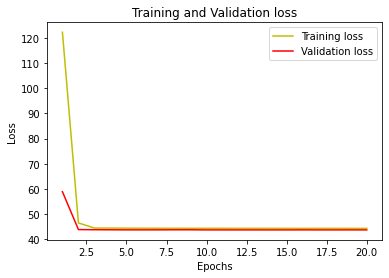

In [13]:
# Plot the training and validation loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
# Does a line
plt.plot(epochs, loss, 'y', label='Training loss')
# Does a dot
#plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

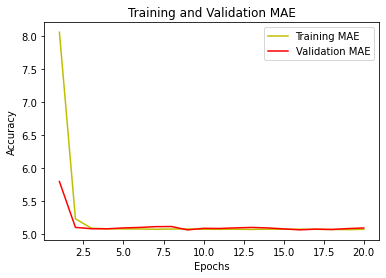

In [14]:
# Plot the training and validation loss at each epoch
acc = history.history['mae']
val_acc = history.history['val_mae']
# Does a line
plt.plot(epochs, acc, 'y', label='Training MAE')
# Does a dot
#plt.plot(epochs, acc, 'bo', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
# Using the model on the Test data now
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
print("Mean Squared Error from neural network: ", mse_neural)
print("Mean Absolute Error from neural network: ", mae_neural)

267/267 [==============================] - 0s 1ms/step - loss: 45.1872 - mae: 5.1024
Mean Squared Error from neural network:  45.187191009521484
Mean Absolute Error from neural network:  5.102386951446533


In [16]:
# Testing the model with predictions
print('Scaled Data')
print(X_train_scaled[5])
print('')
print('NewProjectedPoints')
print(X_train[5])
y_new = model.predict(X_train_scaled)
print('')
print('Prediction')
print(y_new[5])
print('')
print('Actual Label')
print(y_train[5])

Scaled Data
[0.24971174]

NewProjectedPoints
[11.2]
1066/1066 [==============================] - 1s 1ms/step

Prediction
[10.999578]

Actual Label
[9.9]


In order to get a prediction, you need to have the model predict on a scaled version of the X feature(s), since the model was created on scaled data

Now that there is a model, I want it to be tested on data from a csv

In [17]:
# Bring in the data 
df_test = pd.read_csv(f"drive/MyDrive/Fantasy-Football-Coding/Fantasy-Data/OwnersBox/_Current/Current-wk{week}.csv")

The data needs to go through the same transformation as what was trained on the model

In [18]:
# Fill NaN values with 0.0
df_test = df_test.fillna(0.0)
# This keeps all the data where the Projected Points are greather than or equal to 2
df_test = df_test[df_test['NewProjectedPoints'] >= 2]

In [19]:
# Splitting the data into a solo feature
X = df_test[['NewProjectedPoints']].values

In [20]:
# Standardize the features so it matches the type of numbers that the model was trained on
scaler.fit(X)

# The new variables are being scaled based on the standardizing features that happened in X_train
X_scaled = scaler.transform(X)

In [21]:
# Testing the model with predictions
print('Scaled Data')
print(X_scaled[5])
print('')
print('NewProjectedPoints')
print(X[5])
y_points = model.predict(X_scaled)
print('')
print('Prediction')
print(y_points[5])

Scaled Data
[2.20426634]

NewProjectedPoints
[20.96]
10/10 [==============================] - 0s 1ms/step

Prediction
[20.185123]


In [22]:
# Add the new column into the dataframe
df_test = df_test.assign(NNProjectedPoints=y_points)

In [23]:
# Changing the NewProjectedPoints column to round to 3 decimal places
decimals = 3    
df_test['NNProjectedPoints'] = df_test['NNProjectedPoints'].apply(lambda x: round(x, decimals))

In [24]:
# Creating a DataFrame with just the listed columns
df_test = df_test[['Name', 'Position', 'NNProjectedPoints', 'Salary']]
# Eliminating rows where the Salary is equal to 0
df_test = df_test[df_test['Salary'] != 0]

In [25]:
# This is regrouping the dataframe so the players are grouped by Position
availables = df_test.groupby(["Position", "Name", "NNProjectedPoints", "Salary"]).agg('count')
availables = availables.reset_index()

In [26]:
# Define empty dictionaries to track the metrics for the lineup optimizer
salaries = {}
points = {}
players = {}
lineups_dict = {}


for position in availables.Position.unique():
    available_for_position = availables[availables.Position == position]
    players[position] = list(available_for_position.Name.values)
    
    
    salaries[position] = {
        player_roster: salary for player_roster, salary in
        zip(players[position], available_for_position.Salary.values)
    }

    points[position] = {
        player_roster: _points for player_roster, _points in
        zip(players[position], available_for_position.NNProjectedPoints.values)
    }

# This defines another dictionary that has the positions and lineup.
positions_available = {
    "QB": 2,
    "RB": 2,
    "WR": 2,
    "TE": 1,
    "FLEX": 2
    #"SUPER": 1
}

flexible_positions = ("RB", "WR", "TE")

#superflexible_positions = ("QB", "RB", "WR", "TE")

# How much salary the starting amount is for the DFS
salary_cap = 50000

In [27]:
variables = {position: LpVariable.dict(position, players[position], cat="Binary")
               for position in players}

In [28]:
# Putting a range of how many lineups you want created. 
# Every change below the for loop of the range of lineups means each change is happening to a single lineup, that is being looped for a new one each time.
for lineup in range(1, 11):
  # Establishes the variables of the Pulp
  # a pulp variable tracks whether a player is chosen or not (binary yes/no)
  # It's a variable dictionary of keys and values

# The "problem" is we want to have the maximum salary for each lineup. 
  prob = LpProblem("Fantasy", LpMaximize)

  # Creating an empty list to track rewards (points), costs (salary), and positional contraints (position)
  rewards = []
  costs = []
  number_of_selected_players = []

  for position, players in variables.items():
    for player, player_selected in players.items():
      # If this player is selected, he will add salaries and points
        costs += salaries[position][player] * player_selected
        rewards += points[position][player] * player_selected
        number_of_selected_players += player_selected

 
    # Of this position, if it does not support FLEX, at most `positions_available`
    # are supported. If it does support FLEX, increment that by
    # `flexible_positions_available`
    if position not in flexible_positions:
        prob += lpSum(players.values()) == positions_available[position]  # Filling in the QB
  
    else:
          # We need at least `positions_available` players on this position and at
          # most`positions_available + flexible_positions_available` players
          prob += lpSum(players.values()) >= positions_available[position]  # Filling in the RB, WR, TE
          prob += (lpSum(players.values())
                          <= positions_available[position] + positions_available["FLEX"])  # Filling in the FLEX
                   

  # This adds the costs (salary) and rewards (points) into the optimization calculation
  # This sums up the points and sums up the salary while making sure the lineup salary is less than or equal to the 50,000
  # In total, we need exactly `positions_available` players
  prob += lpSum(number_of_selected_players) == sum(positions_available.values())
  prob += lpSum(rewards)
  prob += lpSum(costs) <= salary_cap
  #prob += len(np.unique(id_constraints)) == id_unique
  

  num = 0.001
  # If it's not the first lineup
  if not lineup == 1:
    # Make sure the rewards (points) is less than or equal too the total of the previous lineup, minus 0.01
    # That is too ensure you don't get the same lineup each time becasue the max points of the lineup caps out
    # at just below the previous total projections. This ensures varied lineups, and then solve
    prob += (lpSum(rewards) <= total_score - num)
  prob.solve()

  # Getting the strings for the lineup and the constraints (which is same position) when starting the new lineup.
  score = str(prob.objective)
  constraints = [str(const) for const in prob.constraints.values()]

  # Creating an empty list for storing the lineup
  lineupList = []
  # This will create a list of every player in the dataset with a variable of 1 or 0, depending the player
  # has been chosen for the lineup. This loops through the list to fill in if the player has been chosen or not.
  for v in prob.variables():
      score = score.replace(v.name, str(v.varValue))
      if v.varValue != 0:
        lineupList.append(v.name)

  # # Finally we just have to save the total_score variable for the lineup.       
  total_score = eval(score)
  lineupList.append(total_score)
 
  # # Storing all of the lineups in a dictionary  
  lineups_dict.update({lineup: lineupList})

In [29]:
# Turning the dictionary into a DataFrame
df = pd.DataFrame(lineups_dict)

In [30]:
# Transposing the DataFrame
df = df.T

In [31]:
# Creating a list for what the rename the column names
newcols = ['QB', 'SUPER', 'RB1', 'RB2', 'FLEXorTE', 'TEorFLEX', 'FLEX2', 'WR1', 'WR2', 'Total_Score']

In [32]:
# Adding that column name list into the DataFrame
df.columns = newcols

In [33]:
# Creating a list of what values to remove in each particular cell
removeKeys = ['QB_', 'RB_', 'TE_', 'WR_']
# For each position in each column, when the player has the position and _ in front of it, remove that and replace it with nothing
for pos in newcols:
  for removeKey in removeKeys:
      df[pos] = df[pos].apply(str).str.replace(removeKey,"")
  df[pos] = df[pos].apply(str).str.replace("_", " ")

In [34]:
# Showing what the top lineups are
df.head(1)

,QB,SUPER,RB1,RB2,FLEXorTE,TEorFLEX,FLEX2,WR1,WR2,Total_Score
1,Geno Smith,Patrick Mahomes,Austin Ekeler,Jeff Wilson,Kenneth Walker,Rachaad White,Hayden Hurst,Garrett Wilson,Nico Collins,142.764


In [35]:
# df.to_csv('FF_Data_Wk5.csv', encoding = 'utf-8-sig', index=False) 
# files.download('FF_Data_Wk5.csv')